# Custom Model for Movie Genre Classification

## 1) Introduction
In this section, i will design and create **custom convolutional neural network (CNN)** for classifying movie posters into multiple genres.


## 2) Model Architecture

Our model consists of:
- **Convolutional Blocks**: Each block includes convolutional layers, batch normalization, ReLU activation, and max pooling.
- **Fully Connected Layers**: Dense layers transform extracted features into final predictions.
- **Dropout Layers**: Reduce overfitting by randomly deactivating neurons during training.


## 3) Hyperparameter Choices

| Parameter        | Value  | Reason  |
|-----------------|--------|---------|
| Dataset size      | 200 images | Otherwise training takes about two hours |
| Activation      | ReLU (hidden layers), Sigmoid (output) | Relu for efficiency and Sigmoid for multi-label probability predictions / classifications |
| Optimizer       | Adam   | Adaptive learning rate for better convergence |
| Loss Function   | Binary Crossentropy | Multi-label classification requires independent class probabilities |
| Learning Rate   | 0.0001 | Prevents large gradient updates |
| Batch Size      | 32-64     | Balances training speed and memory usage |
| Dropout Rate    | 0.5    | Helps prevent overfitting |



## 4) Loading in dataset.

In [9]:
import pandas as pd

dataset = pd.read_excel('./data/data.xlsx')
dataset = dataset.head(200)
dataset.head()

,imdbID,Genre
0,tt0080684,"Action, Adventure, Fantasy"
1,tt0081562,"Comedy, Crime"
2,tt0080339,Comedy
3,tt0080377,"Action, Comedy"
4,tt0081375,"Comedy, War"


Before we can use the Genre we need to one hot encode them so they can be used by the Network

In [10]:
clean_genres = dataset['Genre'].str.replace(', ', ',').str.replace(' ,', ',')
Y = clean_genres.str.get_dummies(sep=',')
Y.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
dataset = pd.concat([dataset, Y], axis=1)
dataset

,imdbID,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0080684,"Action, Adventure, Fantasy",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0081562,"Comedy, Crime",0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0080339,Comedy,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0080377,"Action, Comedy",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0081375,"Comedy, War",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,tt0086006,"Action, Adventure, Thriller",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
196,tt0085750,Horror,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
197,tt0085255,"Action, Crime, Drama",1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
198,tt0086619,"Drama, Musical, Romance",0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


We first load all images, preprocess them, and split them into training, validation, and test sets.


In [12]:
import cv2
import numpy as np


# Function to load and normalize images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32) / 255.0
    return img


In [13]:
import os

images_folder = './data/processed'
classnames = Y.columns.tolist()

X_images, y_labels = [], []
for index, row in dataset.iterrows():
    img_name = f"{row['imdbID']}.jpg"
    img_path = os.path.join(images_folder, img_name)
    if os.path.exists(img_path):
        processed_image = preprocess_image(img_path)
        if processed_image is not None:
            X_images.append(processed_image)
            y_labels.append(row[classnames].values.astype(np.float32))

X_images = np.array(X_images)
y_labels = np.array(y_labels)

### Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

Training samples: 160
Validation samples: 20
Test samples: 20


## 5) Implementation in TensorFlow/Keras

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(len(classnames), activation='sigmoid') 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## 6) Model Compilation and Training


In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
)

Epoch 1/50
3/3 [==============================] - 4s 1s/step - loss: 0.6054 - accuracy: 0.1125 - val_loss: 0.3248 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 0.4641 - accuracy: 0.0875 - val_loss: 0.3072 - val_accuracy: 0.4500
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 0.4699 - accuracy: 0.1562 - val_loss: 0.3138 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 0.4485 - accuracy: 0.1813 - val_loss: 0.3180 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 0.4416 - accuracy: 0.1688 - val_loss: 0.3323 - val_accuracy: 0.2000
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.4369 - accuracy: 0.2000 - val_loss: 0.3460 - val_accuracy: 0.3500
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.4276 - accuracy: 0.2188 - val_loss: 0.3427 - val_accuracy: 0.3500
Epoch 8/50
3/3 [=========================

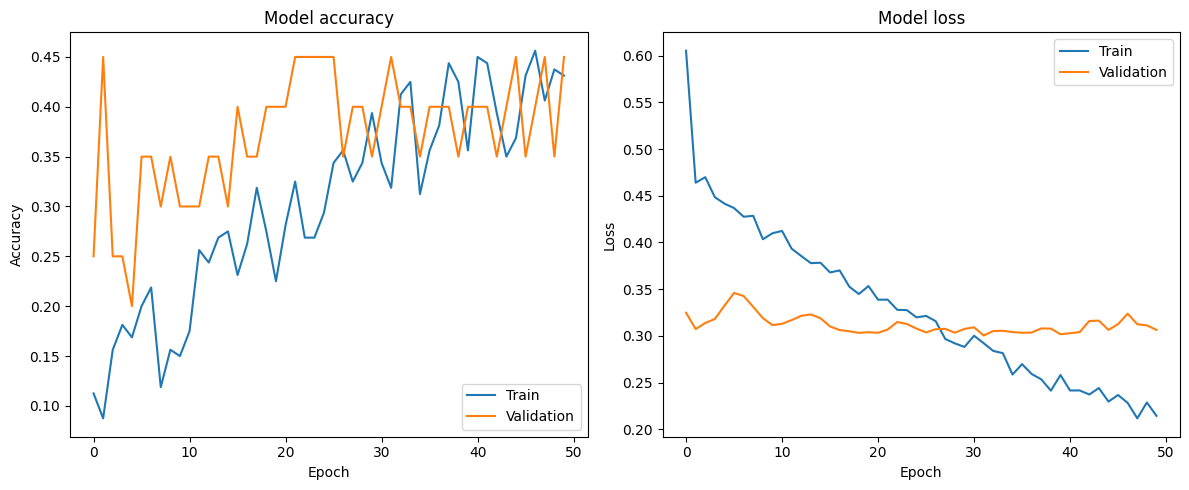

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## 7) Model Evaluation

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 106ms/step - loss: 0.2830 - accuracy: 0.4500
Test Accuracy: 0.4500
